## Manual Neural Network


In [0]:
class SimpleClass():
  def __init__(self):
    print("hello")
    
  def yell(self):
    print("Yelling")

In [2]:
x = SimpleClass()
x.yell()

hello
Yelling


In [0]:
class ExtendedClass(SimpleClass):
  def __init__(self):
    
    super().__init__()
    print("Extend!")

In [4]:
y = ExtendedClass()

hello
Extend!


In [5]:
y.yell()

Yelling


## Operation

In [0]:
class Operation():
  
  def __init__(self, input_nodes = []):
    self.input_nodes = input_nodes
    self.output_nodes = []
    
    for node in input_nodes:
      node.output_nodes.append(self)
      
    _default_graph.operations.append(self)
   
  def compute(self):
    pass

In [0]:
class add(Operation):
  def __init__(self, x, y):
    super().__init__([x, y])
    
   
  def compute(self, x, y):
    self.inputs = [x, y]
    return x + y
    

In [0]:
class multiply(Operation):
  def __init__(self, x, y):
    super().__init__([x, y])
    
   
  def compute(self, x, y):
    self.inputs = [x, y]
    return x * y

In [0]:
class matmul(Operation):
  def __init__(self, x, y):
    super().__init__([x, y])
    
   
  def compute(self, x, y):
    self.inputs = [x, y]
    return x.dot(y)

In [0]:
class Placeholder():
  def __init__(self):
    self.output_nodes = []
    _default_graph.placeholders.append(self)

In [0]:
class Variable():
  def __init__(self, initial_value = None):
    self.value = initial_value
    self.output_nodes = []
    
    _default_graph.variables.append(self)

In [0]:
class Graph():
  def __init__(self):
    
    self.operations = []
    self.placeholders = []
    self.variables = []
  
  def set_as_default(self):
    
    global _default_graph
    _default_graph = self
    

z = Ax + b

A = 10

b = 1


z = 10x + 1


In [0]:
g = Graph()

In [0]:
g.set_as_default()

In [0]:
A = Variable(10)

In [0]:
b = Variable(1)

In [0]:
x = Placeholder()

In [0]:
y = multiply(A, x)

In [0]:
z = add(y, b)

In [0]:
def traverse_postorder(operation):
  
  nodes_postorder = []
  def recurse(node):
    if isinstance(node, Operation):
      for input_node in node.input_nodes:
        recurse(input_node)
    nodes_postorder.append(node)
  
  recurse(operation)
  return nodes_postorder

In [0]:
import numpy as np
class Session():
  def run(self, operation, feed_dict = {}):
    nodes_postorder = traverse_postorder(operation)
    
    for node in nodes_postorder:
      
      if type(node) == Placeholder:
        node.output = feed_dict[node]
      
      elif type(node) == Variable:
        node.output = node.value
      
      else:
        node.inputs = [input_node.output for input_node in node.input_nodes]
        
        node.output = node.compute(*node.inputs)
      
      if type(node.output) == list:
        node.output = np.array(node.output)
      
    return operation.output
      
      

In [0]:
sess = Session()

In [0]:
result = sess.run(operation = z, feed_dict = {x:10})

In [24]:
result

101

In [0]:
g = Graph()
g.set_as_default()

A = Variable([[10, 20], [30, 40]])
b = Variable([1,2,])

x = Placeholder()
y = matmul(A, x)
z = add(y, b)

In [26]:
sess = Session()
sess.run(operation = z, feed_dict = {x:10})

array([[101, 202],
       [301, 402]])

# Classification
## Activation Function

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

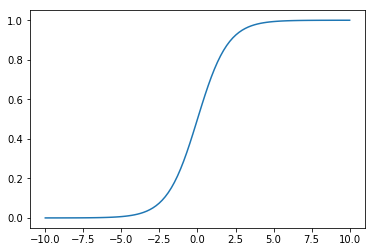

In [29]:
sample_z = np.linspace(-10, 10, 100)
sample_a = sigmoid(sample_z)
plt.plot(sample_z, sample_a)


In [0]:
class Sigmoid(Operation):
  def __init__(self, z):
    super().__init__([z])
   
  
  def compute(self, z):
    return sigmoid(z)

In [0]:
from sklearn.datasets import make_blobs

In [32]:
data = make_blobs(n_samples = 50, n_features = 2, centers = 2, random_state = 75)
data

(array([[  7.3402781 ,   9.36149154],
        [  9.13332743,   8.74906102],
        [  1.99243535,  -8.85885722],
        [  7.38443759,   7.72520389],
        [  7.97613887,   8.80878209],
        [  7.76974352,   9.50899462],
        [  8.3186688 ,  10.1026025 ],
        [  8.79588546,   7.28046702],
        [  9.81270381,   9.46968531],
        [  1.57961049,  -8.17089971],
        [  0.06441546,  -9.04982817],
        [  7.2075117 ,   7.04533624],
        [  9.10704928,   9.0272212 ],
        [  1.82921897,  -9.86956281],
        [  7.85036314,   7.986659  ],
        [  3.04605603,  -7.50486114],
        [  1.85582689,  -6.74473432],
        [  2.88603902,  -8.85261704],
        [ -1.20046211,  -9.55928542],
        [  2.00890845,  -9.78471782],
        [  7.68945113,   9.01706723],
        [  6.42356167,   8.33356412],
        [  8.15467319,   7.87489634],
        [  1.92000795,  -7.50953708],
        [  1.90073973,  -7.24386675],
        [  7.7605855 ,   7.05124418],
        [  6

In [0]:
features = data[0]
labels = data[1]

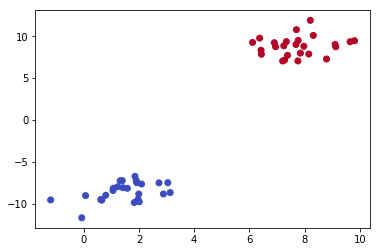

In [34]:
plt.scatter(features[:, 0], features[:, 1], c = labels, cmap = 'coolwarm')

In [0]:
x = np.linspace(0, 11, 10)
y = -x + 5

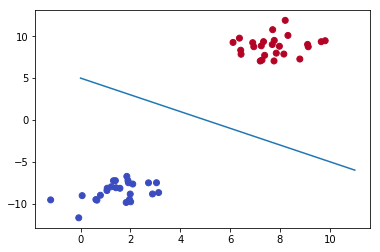

In [36]:
plt.scatter(features[:, 0], features[:, 1], c = labels, cmap = 'coolwarm')
plt.plot(x, y)

In [37]:
np.array([1, 1]).dot(np.array([[9], [10]])) - 5

array([14])

In [0]:
g = Graph()
g.set_as_default()
x = Placeholder()
w = Variable([1, 1])
b = Variable(-5)
z = add(matmul(w, x), b)
a = Sigmoid(z)

In [40]:
session = Session()
session.run(operation = a, feed_dict = {x:[8, 10]})

0.999997739675702